In [1]:
from FCNetwork_Weighted import TrainFCNN
from utils.helper import Extract
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
import os
import torch

In [2]:
extract = Extract()

In [3]:
train_df_list = extract.load_all_csv('./data/mouse/train')
test_df_list = extract.load_all_csv('./data/mouse/test')
# debug_df_list = extract.load_all_csv('./data/enc_debug_set')

### Gaussian Weighted

In [4]:
fc_model_win_10 = TrainFCNN(10,40, weighted='gauss')

In [5]:
fc_model_win_10.loadTestTrainData(train_df_list, test_df_list, max_size=1000, logging=True)

Train data extraction started.
0 Dataframes seperated into labels and features.
100 Dataframes seperated into labels and features.
200 Dataframes seperated into labels and features.
300 Dataframes seperated into labels and features.
400 Dataframes seperated into labels and features.
500 Dataframes seperated into labels and features.
600 Dataframes seperated into labels and features.
700 Dataframes seperated into labels and features.
800 Dataframes seperated into labels and features.
900 Dataframes seperated into labels and features.
1000 Dataframes seperated into labels and features.
Test data extraction started.
0 Dataframes seperated into labels and features.
100 Dataframes seperated into labels and features.
200 Dataframes seperated into labels and features.
300 Dataframes seperated into labels and features.
400 Dataframes seperated into labels and features.
500 Dataframes seperated into labels and features.
Test and Train data extracted.


In [6]:
cwd = os.getcwd()
path = cwd + "/" + "models/mouse/fcnn_win_10_epochs_50_gauss.pt"
fc_model_win_10.trainNN(num_epochs=200, logging=True, save_path=path, save_after_epochs=50)

Epoch: 1 Current Loss: 2.692234992980957 Avg Loss: 2.4632340716776486
Epoch: 6 Current Loss: 2.822798013687134 Avg Loss: 2.213434835950758
Epoch: 11 Current Loss: 2.3453209400177 Avg Loss: 2.176726745816905
Epoch: 16 Current Loss: 3.700319766998291 Avg Loss: 2.158329010502212
Epoch: 21 Current Loss: 3.100956916809082 Avg Loss: 2.14653058030842
Epoch: 26 Current Loss: 1.9646350145339966 Avg Loss: 2.141009111145373
Epoch: 31 Current Loss: 0.914991021156311 Avg Loss: 2.1340699673493306
Epoch: 36 Current Loss: 1.0235079526901245 Avg Loss: 2.130576075705081
Epoch: 41 Current Loss: 1.8006685972213745 Avg Loss: 2.1266506359398836
Epoch: 46 Current Loss: 2.566964626312256 Avg Loss: 2.122712370125022


In [9]:
predicted_prots_10 = fc_model_win_10.predict_on_test_data()

tensor(0.2567, grad_fn=<DivBackward0>)


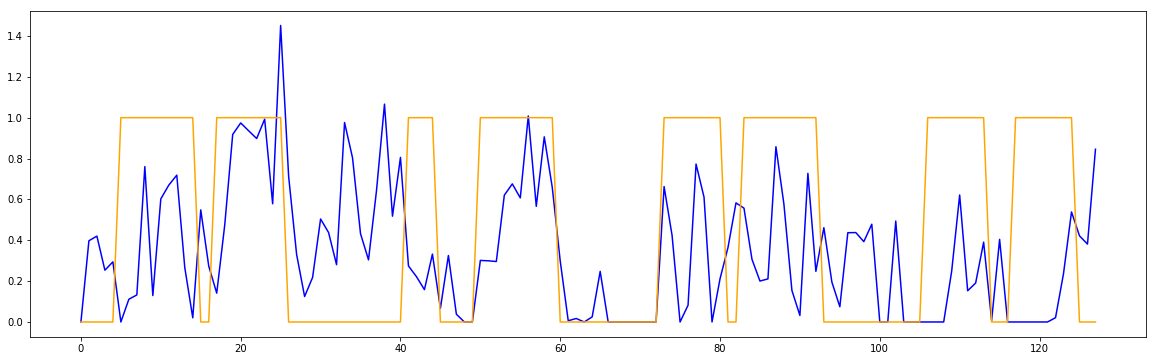

In [15]:
n = 5
plt.figure(figsize=(20, 6))
plt.plot(predicted_prots_10[n][1], color='blue')
plt.plot(predicted_prots_10[n][2], color='orange')
print(predicted_prots_10[n][0])

In [11]:
loss = 0
for protein in predicted_prots_10:
    loss += protein[0]
    
print(loss/len(predicted_prots_10))

tensor(0.2278, grad_fn=<DivBackward0>)


### Center Weighted

In [4]:
fc_model_win_10_center = TrainFCNN(10,40, weighted='center')
fc_model_win_10_center.loadTestTrainData(train_df_list, test_df_list, max_size=20, logging=True)

Train data extraction started.
0 Dataframes seperated into labels and features.
Test data extraction started.
0 Dataframes seperated into labels and features.
Test and Train data extracted.


In [14]:
cwd = os.getcwd()
path = cwd + "/" + "models/mouse/fcnn_win_10_epochs_50_center.pt"
fc_model_win_10_center.trainNN(num_epochs=50, logging=True, save_path=path, save_after_epochs=50)

Epoch: 1 Current Loss: 0.0 Avg Loss: 0.5981335158960648
Epoch: 6 Current Loss: 0.2361602932214737 Avg Loss: 0.597292583636755
Epoch: 11 Current Loss: 2.349219799041748 Avg Loss: 0.6012068880185977
Epoch: 16 Current Loss: 0.2812562584877014 Avg Loss: 0.605579372569202
Epoch: 21 Current Loss: 2.0753438472747803 Avg Loss: 0.6007683220322745
Epoch: 26 Current Loss: 1.8165411949157715 Avg Loss: 0.6020770469750719
Epoch: 31 Current Loss: 0.32638099789619446 Avg Loss: 0.6032457044062574
Epoch: 36 Current Loss: 0.45179271697998047 Avg Loss: 0.606528138725377
Epoch: 41 Current Loss: 0.37973880767822266 Avg Loss: 0.590849243972356
Epoch: 46 Current Loss: 0.0 Avg Loss: 0.6072649205716344


In [15]:
predicted_prots_10 = fc_model_win_10_center.predict_on_test_data()

tensor(0.0843, grad_fn=<DivBackward0>)


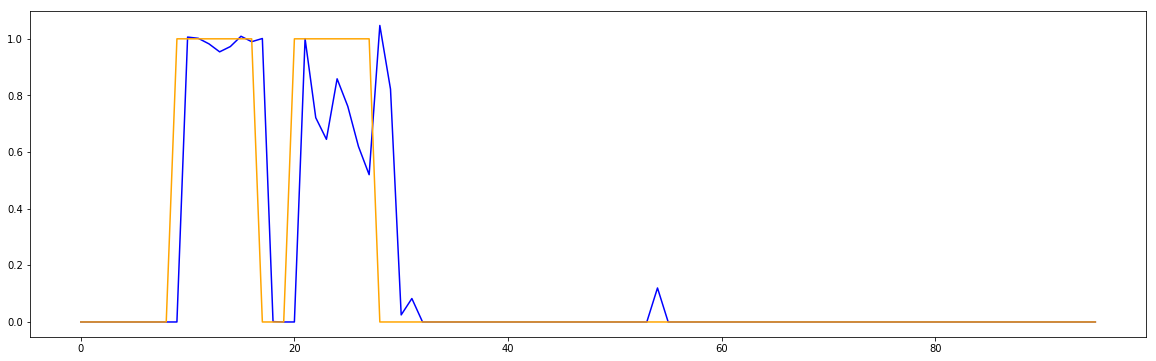

In [27]:
n = 2
plt.figure(figsize=(20, 6))
plt.plot(predicted_prots_10[n][1], color='blue')
plt.plot(predicted_prots_10[n][2], color='orange')
print(predicted_prots_10[n][0])